<a href="https://colab.research.google.com/github/HarmanBhutani/ML_projects/blob/main/Assignment4_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install contractions

     |████████████████████████████████| 327kB 5.5MB/s 
     |████████████████████████████████| 266kB 40.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85394 sha256=0c77c447b06ae4cf73055205ff478b79c28af287ba4ae9c28ed22216da37d51b
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim import corpora
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [4]:
df_tor = pd.read_excel('Tornado.xlsx', header=None)

In [5]:
df_tor

,0,1,2,3,4,5,6,7,8,9,10
0,0\tRT @uberdogfound: Please RT - Food needed f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1\tPlease RT - Food needed for shelter in NC i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3\t‚ô°its raining and tornado warnings....abou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10\tSaved by the tornado warning....I'm just r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3626,39\tThanks to @BarackObama and @SethMeyers21 f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3627,0\tStamford-based AmeriCares is preparing to s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3628,"2\t""Semi-trailer parked at People's Church Spr...",leaves 2pm Sun. Need water food batteries bla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3629,3\tRT @TopNoTcH_B1tch: My mom is goin out of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_tor=df_tor.fillna('')

In [7]:
df_tor=df_tor.astype(str)

In [8]:
df_tor.head().apply(lambda x: ''.join(x), axis=1)

0    0\tRT @uberdogfound: Please RT - Food needed f...
1    1\tPlease RT - Food needed for shelter in NC i...
2    3\t‚ô°its raining and tornado warnings....abou...
3    9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...
4    10\tSaved by the tornado warning....I'm just r...
dtype: object

In [9]:
df_tor.shape

(3631, 11)

In [10]:
df_tor.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0\tRT @uberdogfound: Please RT - Food needed f...,,,,,,,,,,
1,1\tPlease RT - Food needed for shelter in NC i...,,,,,,,,,,
2,3\t‚ô°its raining and tornado warnings....abou...,,,,,,,,,,
3,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...,,,,,,,,,,
4,10\tSaved by the tornado warning....I'm just r...,,,,,,,,,,


In [11]:
df_tor[0]

0       0\tRT @uberdogfound: Please RT - Food needed f...
1       1\tPlease RT - Food needed for shelter in NC i...
2       3\t‚ô°its raining and tornado warnings....abou...
3       9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...
4       10\tSaved by the tornado warning....I'm just r...
                              ...                        
3626    39\tThanks to @BarackObama and @SethMeyers21 f...
3627    0\tStamford-based AmeriCares is preparing to s...
3628    2\t"Semi-trailer parked at People's Church Spr...
3629    3\tRT @TopNoTcH_B1tch: My mom is goin out of t...
3630    6\t"Volunteers Offer Support to Southern Torna...
Name: 0, Length: 3631, dtype: object

In [12]:
for text in df_tor[0].head():
    print(text)

0	RT @uberdogfound: Please RT - Food needed for shelter in NC in area that was hit hard by tornado. Please contact us at…	40657.975
1	Please RT - Food needed for shelter in NC in area that was hit hard by tornado.  Please contact us at info@uberdogfoundation.org to help!	40657.975
3	‚ô°its raining and tornado warnings....about to be in a coma from eating all this food in a few!!!‚òª‚òª	40657.89792
9	Lmao #damn RT @LuCeCaNNoNn: If I don't get any food I hope the tornado blow all yall food out yall mouth #SoIDC	40657.76667
10	Saved by the tornado warning....I'm just ready to eat this good food	40657.75625


Polarity

In [13]:
sentiment_ob = [TextBlob(text) for text in df_tor[0]]

In [14]:
polarity = [sen.sentiment.polarity for sen in sentiment_ob]

A.2

Visualization of Polarity

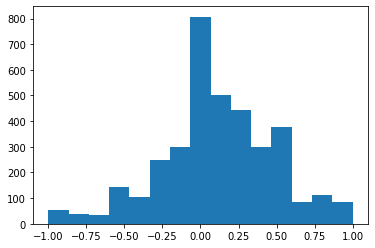

In [15]:
plt.hist(polarity, bins=15)
plt.show()

A.3

Most of the tweets are positive

Part B

In [16]:
df_tor[0] = [re.sub(r'@\w+|http\S+|www\S+|#\S+',"",line.lower()) for line in df_tor[0]]

In [17]:
punc = set([word for line in df_tor[0] for word in line if not word.isalnum()])
punc.remove(' ')
punc.remove("'")
remove = '|'.join('\\'+i for i in punc)

In [18]:
df_tor[0] = df_tor[0].apply(lambda x: re.sub(remove, '', x))

In [19]:
for text in df_tor[0].head():
    print(text)

0rt  please rt  food needed for shelter in nc in area that was hit hard by tornado please contact us at40657975
1please rt  food needed for shelter in nc in area that was hit hard by tornado  please contact us at infoorg to help40657975
3ôits raining and tornado warningsabout to be in a coma from eating all this food in a fewòªòª4065789792
9lmao  rt  if i don't get any food i hope the tornado blow all yall food out yall mouth 4065776667
10saved by the tornado warningi'm just ready to eat this good food4065775625


In [20]:
d = contractions.contractions_dict

In [21]:
df_tor[0] = df_tor[0].apply(lambda x: ' '.join([d[wor] if wor in d.keys() else wor for wor in x.split()]))

In [22]:
for text in df_tor[0].head():
    print(text)

0rt please rt food needed for shelter in nc in area that was hit hard by tornado please contact us at40657975
1please rt food needed for shelter in nc in area that was hit hard by tornado please contact us at infoorg to help40657975
3ôits raining and tornado warningsabout to be in a coma from eating all this food in a fewòªòª4065789792
9lmao rt if i do not get any food i hope the tornado blow all yall food out yall mouth 4065776667
10saved by the tornado warningi'm just ready to eat this good food4065775625


In [28]:
st_words = set(stopwords.words('english'))

In [29]:
df_tor[0] = df_tor[0].apply(lambda x: [word for word in x.split() if word not in st_words])

In [30]:
for text in df_tor[0].head():
    print(text)

['0rt', 'please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'us', 'at40657975']
['1please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'us', 'infoorg', 'help40657975']
['3ôits', 'raining', 'tornado', 'warningsabout', 'coma', 'eating', 'food', 'fewòªòª4065789792']
['9lmao', 'rt', 'get', 'food', 'hope', 'tornado', 'blow', 'yall', 'food', 'yall', 'mouth', '4065776667']
['10saved', 'tornado', "warningi'm", 'ready', 'eat', 'good', 'food4065775625']


In [31]:
wnl = WordNetLemmatizer()

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [34]:
df_tor[0] = df_tor[0].apply(lambda x: [wnl.lemmatize(word) for word in x])

In [35]:
for text in df_tor[0].head():
    print(text)

['0rt', 'please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'u', 'at40657975']
['1please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'u', 'infoorg', 'help40657975']
['3ôits', 'raining', 'tornado', 'warningsabout', 'coma', 'eating', 'food', 'fewòªòª4065789792']
['9lmao', 'rt', 'get', 'food', 'hope', 'tornado', 'blow', 'yall', 'food', 'yall', 'mouth', '4065776667']
['10saved', 'tornado', "warningi'm", 'ready', 'eat', 'good', 'food4065775625']


In [41]:
df_tor[0].str.split(expand=True).stack().value_counts()

Series([], dtype: int64)

In [42]:
tweets_lemmatize_values = ','.join([item for sub_list in df_tor[0] for item in sub_list])

In [44]:
from collections import Counter  

In [47]:
from spacy.lang.en import English

In [48]:
nlp = English()

In [49]:
nlp.max_length = 40000000

In [50]:
tweets_lemmatize_inter = nlp(tweets_lemmatize_values)


tweets_lemmatize_inter1 = [token.text for token in tweets_lemmatize_inter if token.is_punct != True]


all_word_freq = Counter(tweets_lemmatize_inter1)

# get the 10 most frequent words
top_ten_words = all_word_freq.most_common(10)

# view the 10 most common words
top_ten_words

[('tornado', 2381),
 ('shelter', 843),
 ('car', 740),
 ('warning', 416),
 ('food', 320),
 ('rt', 283),
 ('take', 282),
 ('seek', 232),
 ('ride', 212),
 ('get', 209)]

In [51]:
frequency_data = pd.DataFrame.from_dict(all_word_freq, orient='index').reset_index()
frequency_data.columns=["word", "frequency"]

In [55]:
pip install sns

  Created wheel for sns: filename=sns-0.1-cp37-none-any.whl size=2664 sha256=13851f19ce83500fdefb276e49ada4330c19bae8bc19e97e10c537897a48c88c
  Stored in directory: /root/.cache/pip/wheels/be/a5/d8/4390400ed430c8186a6af96dbb1cc7d0a00a5dee15d268b627
Successfully built sns


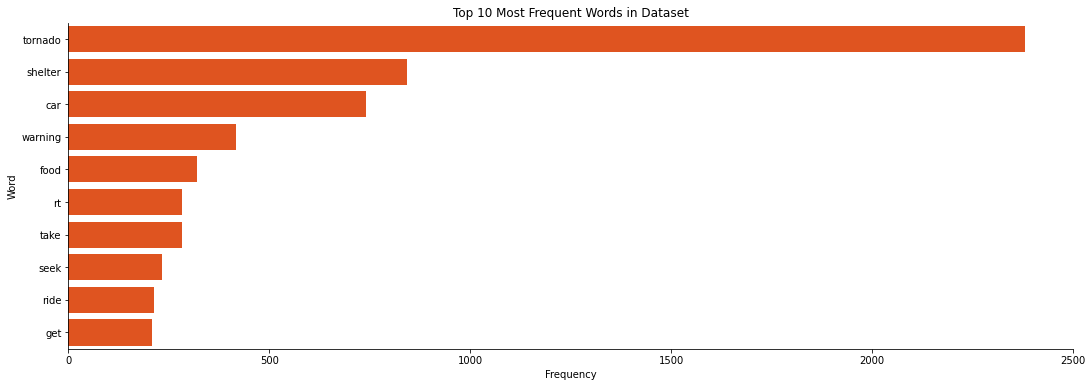

In [60]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data=frequency_data.sort_values(by="frequency", ascending=False).head(10), 
            y="word", 
            x="frequency", 
            color='#FF4500')
plt.ylabel("Word")
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Words in Dataset")
sns.despine();

In [36]:
dictionary = corpora.Dictionary(df_tor[0].tolist())

In [37]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_tor[0]]

In [38]:
lda = gensim.models.ldamodel.LdaModel

In [39]:
lda_model = lda(doc_term_matrix, num_topics=5, id2word=dictionary, passes=5)

In [40]:
print(lda_model.print_topics())

[(0, '0.059*"tornado" + 0.032*"car" + 0.017*"shelter" + 0.013*"rt" + 0.011*"tuscaloosa" + 0.006*"ripping" + 0.005*"go" + 0.005*"destructive" + 0.005*"damage" + 0.005*"place"'), (1, '0.055*"tornado" + 0.033*"shelter" + 0.024*"warning" + 0.016*"seek" + 0.009*"food" + 0.008*"county" + 0.007*"car" + 0.006*"nw" + 0.006*"part" + 0.005*"victim"'), (2, '0.051*"tornado" + 0.023*"shelter" + 0.010*"go" + 0.009*"take" + 0.009*"i\'m" + 0.008*"warning" + 0.007*"u" + 0.007*"near" + 0.006*"hit" + 0.006*"right"'), (3, '0.052*"tornado" + 0.025*"car" + 0.013*"shelter" + 0.013*"get" + 0.011*"warning" + 0.008*"storm" + 0.007*"take" + 0.006*"food" + 0.005*"want" + 0.005*"i\'m"'), (4, '0.060*"tornado" + 0.052*"car" + 0.027*"ride" + 0.007*"rt" + 0.006*"food" + 0.006*"got" + 0.005*"i\'m" + 0.005*"lol" + 0.004*"near" + 0.004*"going"')]
